In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data_for_segmenting.csv")

In [3]:
# Perform basic data exploration
df.head() # Print the first few rows of the DataFrame


,Unnamed: 0,Panel ID,S2 Are you...,S3 How old are you?,S4 Do you own or intend to apply for a credit card in the next six months?,Q5 At what stage of planning are you now? [SA],S4b Do you have a bank account?,S5 Are you ?,S6 Do you have any children under the age of 18 living at home with you?,S7b What is your current situation?,...,"S15 How often, it at all, are you late paying a credit card or household bill?","S16 When you have been late paying, how long has this been?",S17 Which of these statements best describe your attitude to being late paying a bill?,Q1a You mentioned you have a credit card. How many credit cards(s) do you own? Please include all you own even if you do not use them regularly,Rejected - any,Rejected - traditional,Rejected - digital,Rejected - other,Number of banks rejecting,Rejections (grouped
0,1,d78c678406ab2331_2a2865fac55b0299_115b91713025...,1,2,1,NaN,1,2,1,1,...,1,NaN,1,3.0,0,0,0,0,0,NaN
1,3,fa94877484a976dd_2a2865fac55b0299_115b91713025...,2,4,1,NaN,1,2,1,9,...,2,1.0,2,1.0,1,1,1,0,2,2.0
2,7,d4b42850cc1d9d3c_2a2865fac55b0299_115b91713025...,1,2,2,3.0,1,1,2,1,...,2,1.0,1,NaN,1,1,1,0,2,2.0
3,9,49b7c07f83891bbd_2a2865fac55b0299_115b91713025...,2,2,2,3.0,1,2,1,1,...,1,NaN,1,NaN,1,1,0,0,1,1.0
4,10,b7fba0a248f41695_2a2865fac55b0299_115b91713025...,1,6,1,NaN,1,2,1,1,...,2,1.0,1,2.0,1,0,0,1,1,1.0


In [4]:
df.info() # Get summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 34 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Unnamed: 0                                                                                                                                                            755 non-null    int64  
 1   Panel ID                                                                                                                                                              679 non-null    object 
 2   S2 Are you...                                                                                                 

In [5]:
print(df.describe())  # Get statistical summary of the numeric columns

        Unnamed: 0  S2 Are you...    S3 How old are you?  \
count   755.000000       755.000000           755.000000   
mean    730.784106         1.509934             3.080795   
std     434.659057         0.500233             1.306011   
min       1.000000         1.000000             2.000000   
25%     344.500000         1.000000             2.000000   
50%     713.000000         2.000000             3.000000   
75%    1117.000000         2.000000             4.000000   
max    1437.000000         2.000000             6.000000   

       S4 Do you own or intend to apply for a credit card in the next six months?  \
count                                         755.000000                            
mean                                            1.411921                            
std                                             0.492507                            
min                                             1.000000                            
25%                               

In [6]:
# Define the new column names
new_columns = ['index','Customer_ID', 'Gender', 'Age', 'Credit_Card_Intention', 'Credit_Card_Planning_Stage',
               'Bank_Account_Ownership', 'Marital_Status', 'Children_Under_18', 'Current_Situation', 'Employment_Status',
               'Income_Band_Detail', 'Income_Band_Summary', 'Income_Stability', 'Monthly_Income', 'Payday_Loan_Usage',
               'Genuine_Payday_Loan_User', 'Num_Payday_Loan_Companies', 'Num_Payday_Loans', 'Credit_Card_Type_Owned',
               'Credit_Card_Type_Considered', 'Combined_Credit_Card_Type', 'Credit_Card_Motivation', 'Credit_Card_Usage_for_Bills',
               'Late_Payment_Frequency', 'Late_Payment_Duration', 'Attitude_to_Late_Payments', 'Num_Credit_Cards',
               'Num_Rejections', 'Num_Traditional_Bank_Rejections', 'Num_Digital_Bank_Rejections', 'Num_Other_Bank_Rejections',
               'Num_Banks_Rejecting', 'Rejections_Grouped']

# Assign the new column names to the DataFrame
df.columns = new_columns

# Print the updated column names
print(df.columns)

Index(['index', 'Customer_ID', 'Gender', 'Age', 'Credit_Card_Intention',
       'Credit_Card_Planning_Stage', 'Bank_Account_Ownership',
       'Marital_Status', 'Children_Under_18', 'Current_Situation',
       'Employment_Status', 'Income_Band_Detail', 'Income_Band_Summary',
       'Income_Stability', 'Monthly_Income', 'Payday_Loan_Usage',
       'Genuine_Payday_Loan_User', 'Num_Payday_Loan_Companies',
       'Num_Payday_Loans', 'Credit_Card_Type_Owned',
       'Credit_Card_Type_Considered', 'Combined_Credit_Card_Type',
       'Credit_Card_Motivation', 'Credit_Card_Usage_for_Bills',
       'Late_Payment_Frequency', 'Late_Payment_Duration',
       'Attitude_to_Late_Payments', 'Num_Credit_Cards', 'Num_Rejections',
       'Num_Traditional_Bank_Rejections', 'Num_Digital_Bank_Rejections',
       'Num_Other_Bank_Rejections', 'Num_Banks_Rejecting',
       'Rejections_Grouped'],
      dtype='object')


In [7]:
df.isnull().sum()

index                                0
Customer_ID                         76
Gender                               0
Age                                  0
Credit_Card_Intention                0
Credit_Card_Planning_Stage         444
Bank_Account_Ownership               0
Marital_Status                       0
Children_Under_18                    0
Current_Situation                    0
Employment_Status                    0
Income_Band_Detail                 225
Income_Band_Summary                225
Income_Stability                   225
Monthly_Income                     225
Payday_Loan_Usage                    0
Genuine_Payday_Loan_User             0
Num_Payday_Loan_Companies            0
Num_Payday_Loans                   351
Credit_Card_Type_Owned               0
Credit_Card_Type_Considered          0
Combined_Credit_Card_Type            0
Credit_Card_Motivation               0
Credit_Card_Usage_for_Bills          0
Late_Payment_Frequency               0
Late_Payment_Duration    

In [8]:
df.fillna(df.mean(), inplace=True)

C:\Users\dip07\AppData\Local\Temp\ipykernel_8188\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [9]:
df.isnull()

,index,Customer_ID,Gender,Age,Credit_Card_Intention,Credit_Card_Planning_Stage,Bank_Account_Ownership,Marital_Status,Children_Under_18,Current_Situation,...,Late_Payment_Frequency,Late_Payment_Duration,Attitude_to_Late_Payments,Num_Credit_Cards,Num_Rejections,Num_Traditional_Bank_Rejections,Num_Digital_Bank_Rejections,Num_Other_Bank_Rejections,Num_Banks_Rejecting,Rejections_Grouped
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
751,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
752,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
753,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df = df.drop(['index', 'Customer_ID'], axis=1)

In [11]:
df.head()

,Gender,Age,Credit_Card_Intention,Credit_Card_Planning_Stage,Bank_Account_Ownership,Marital_Status,Children_Under_18,Current_Situation,Employment_Status,Income_Band_Detail,...,Late_Payment_Frequency,Late_Payment_Duration,Attitude_to_Late_Payments,Num_Credit_Cards,Num_Rejections,Num_Traditional_Bank_Rejections,Num_Digital_Bank_Rejections,Num_Other_Bank_Rejections,Num_Banks_Rejecting,Rejections_Grouped
0,1,2,1,1.697749,1,2,1,1,1,5.000000,...,1,1.464567,1,3.000000,0,0,0,0,0,1.583333
1,2,4,1,1.697749,1,2,1,9,2,4.666038,...,2,1.000000,2,1.000000,1,1,1,0,2,2.000000
2,1,2,2,3.000000,1,1,2,1,1,6.000000,...,2,1.000000,1,2.123874,1,1,1,0,2,2.000000
3,2,2,2,3.000000,1,2,1,1,1,1.000000,...,1,1.464567,1,2.123874,1,1,0,0,1,1.000000
4,1,6,1,1.697749,1,2,1,1,1,6.000000,...,2,1.000000,1,2.000000,1,0,0,1,1,1.000000


In [36]:
# Identify relevant features for segmentation
selected_features = ['Age', 'Income_Band_Summary', 'Employment_Status', 'Late_Payment_Frequency', 'Credit_Card_Motivation']

# Create a new DataFrame with selected features
df_selected = df[selected_features].copy()

# Encode categorical variables
df_selected = pd.get_dummies(df_selected, drop_first=True)


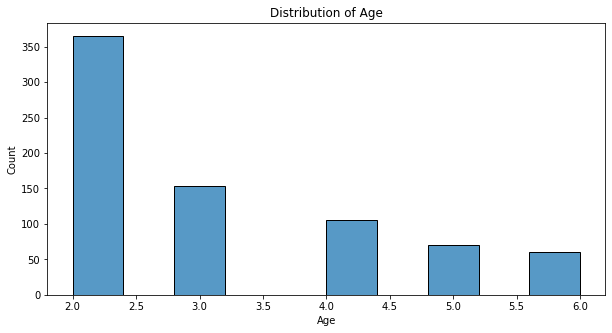

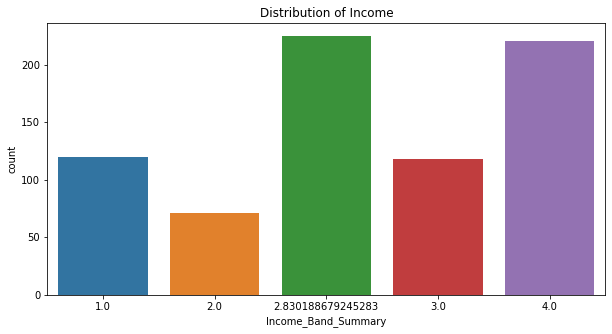

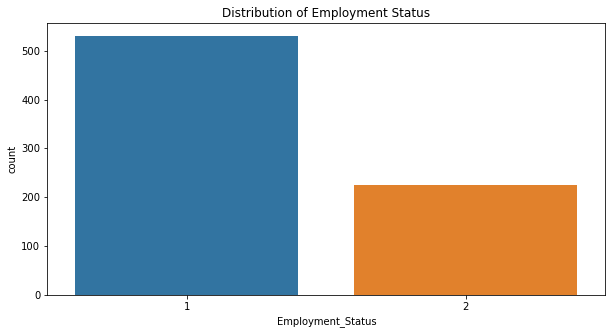

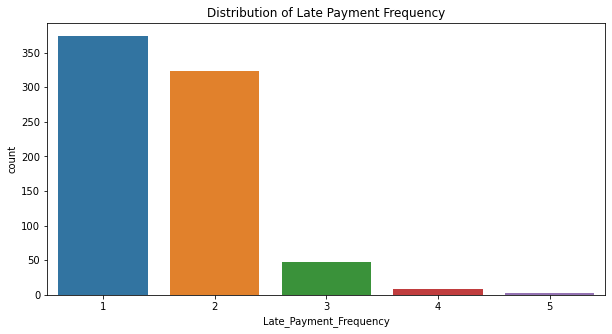

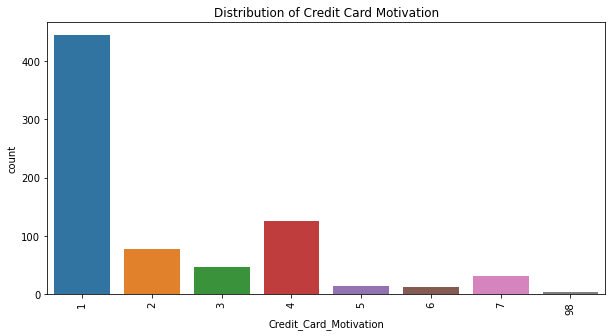

<Figure size 720x720 with 0 Axes>

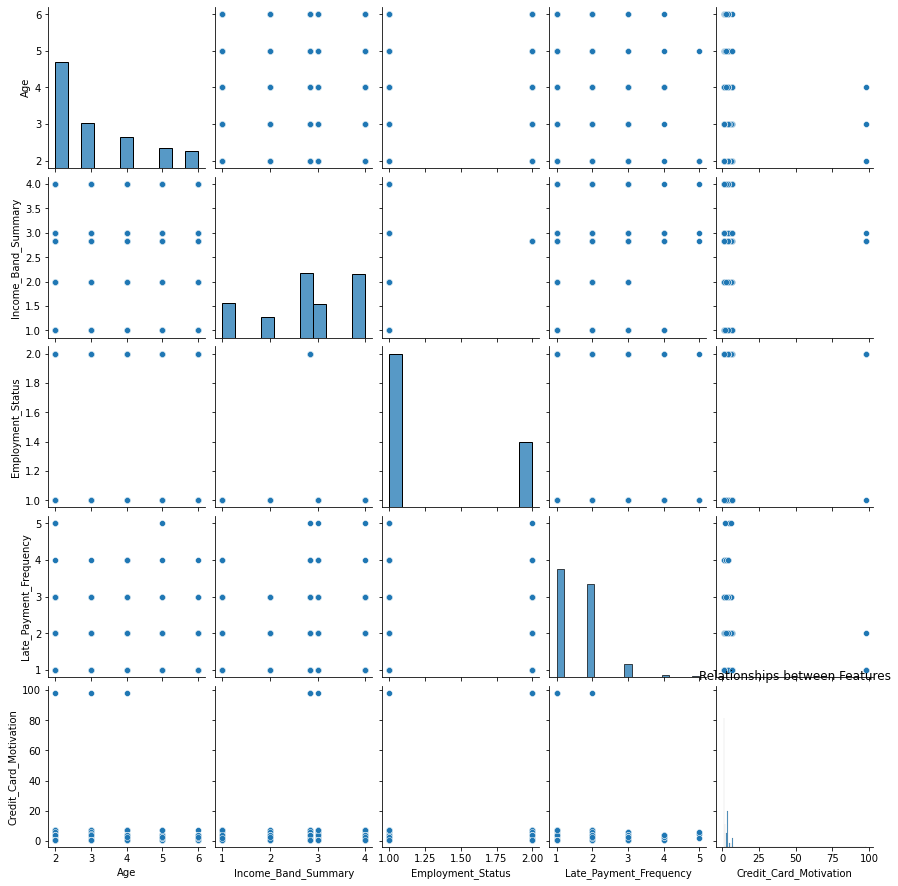

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of selected features
plt.figure(figsize=(10, 5))
sns.histplot(data=df_selected, x='Age', bins=10)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x='Income_Band_Summary')
plt.title('Distribution of Income')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x='Employment_Status')
plt.title('Distribution of Employment Status')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x='Late_Payment_Frequency')
plt.title('Distribution of Late Payment Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x='Credit_Card_Motivation')
plt.title('Distribution of Credit Card Motivation')
plt.xticks(rotation=90)
plt.show()

# Analyze relationships between features
plt.figure(figsize=(10, 10))
sns.pairplot(df_selected)
plt.title('Relationships between Features')
plt.show()


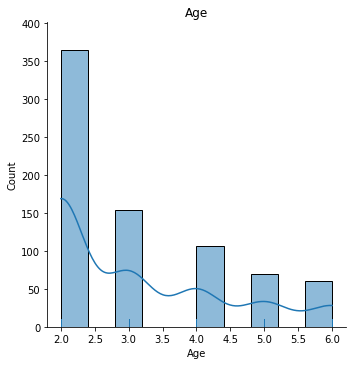

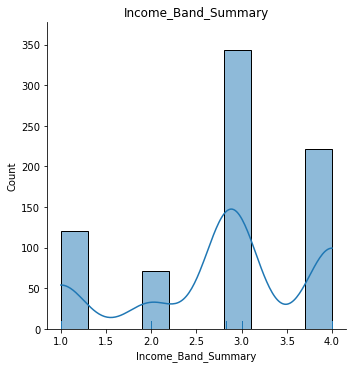

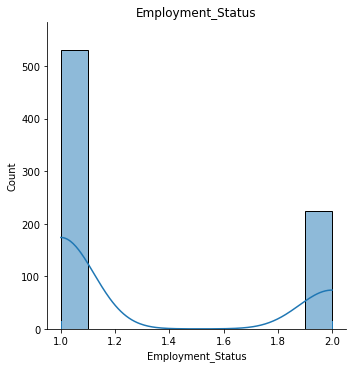

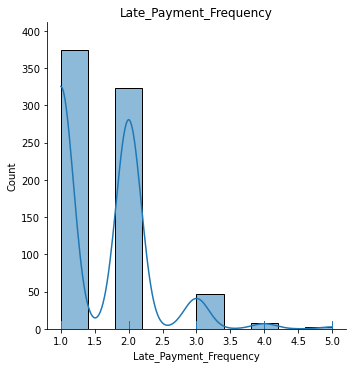

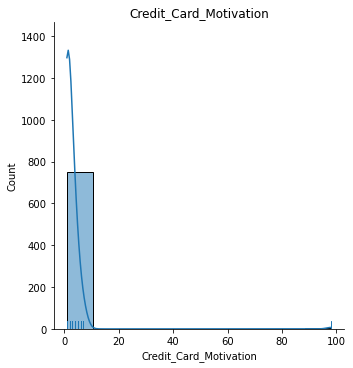

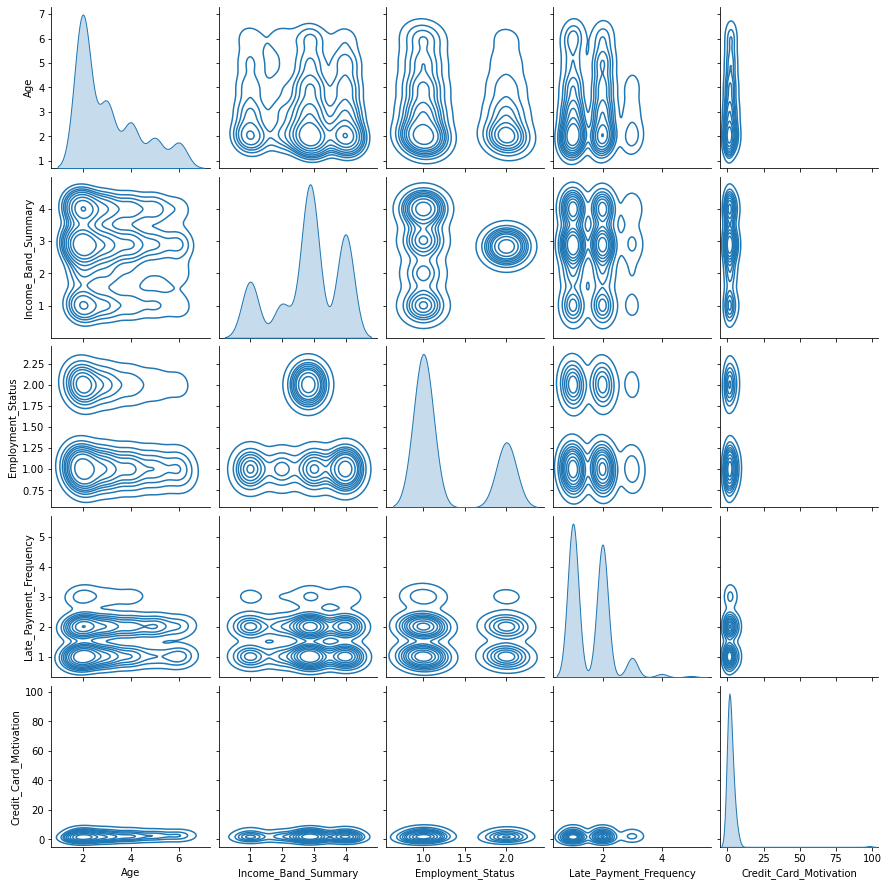

In [14]:
# Select the features to visualize
selected_features = ["Age", "Income_Band_Summary", "Employment_Status", "Late_Payment_Frequency", "Credit_Card_Motivation"]

# Visualize the distribution of selected features
for feature in selected_features:
    sns.displot(data=df, x=feature, bins=10, kde=True, rug=True)
    plt.title(feature)
    plt.show()

# Analyze relationships between features
sns.pairplot(df[selected_features], kind="kde")
plt.show()

In [15]:
from sklearn.cluster import KMeans

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features_for_clustering = ['Age', 'Income_Band_Summary']

# Create a new DataFrame for clustering
df_clustering = df_selected[features_for_clustering].copy()

# Standardize the data
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)


In [17]:
# Apply K-means clustering
kmeans.fit(df_clustering_scaled)

# Get cluster assignments
cluster_labels = kmeans.labels_
df_selected['Cluster'] = cluster_labels


C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
# Analyze the characteristics of each cluster
cluster_summary = df_selected.groupby('Cluster').mean()

print(cluster_summary)


              Age  Income_Band_Summary  Employment_Status  \
Cluster                                                     
0        2.276119             3.314184           1.420398   
1        4.911917             3.064718           1.290155   
2        2.893750             1.331250           1.000000   

         Late_Payment_Frequency  Credit_Card_Motivation  
Cluster                                                  
0                      1.544776                2.437811  
1                      1.678756                3.036269  
2                      1.643750                2.087500  


In [19]:
# Assign each customer to their respective cluster
df['Segment'] = cluster_labels

# Explore each segment
for segment in df['Segment'].unique():
    segment_df = df[df['Segment'] == segment]
    # Perform further analysis or generate insights for each segment


In [20]:
segment_df

,Gender,Age,Credit_Card_Intention,Credit_Card_Planning_Stage,Bank_Account_Ownership,Marital_Status,Children_Under_18,Current_Situation,Employment_Status,Income_Band_Detail,...,Late_Payment_Duration,Attitude_to_Late_Payments,Num_Credit_Cards,Num_Rejections,Num_Traditional_Bank_Rejections,Num_Digital_Bank_Rejections,Num_Other_Bank_Rejections,Num_Banks_Rejecting,Rejections_Grouped,Segment
3,2,2,2,3.000000,1,2,1,1,1,1.0,...,1.464567,1,2.123874,1,1,0,0,1,1.000000,2
14,1,4,2,1.000000,1,2,1,3,1,1.0,...,1.000000,1,2.123874,1,1,0,0,1,1.000000,2
21,1,3,2,1.000000,1,1,2,3,1,3.0,...,1.464567,1,2.123874,0,0,0,0,0,1.583333,2
27,2,2,2,2.000000,1,1,2,1,1,3.0,...,1.464567,1,2.123874,0,0,0,0,0,1.583333,2
30,1,4,1,1.697749,1,3,1,1,1,4.0,...,1.464567,2,3.000000,1,1,0,0,3,2.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2,2,1,1.697749,1,2,1,3,1,3.0,...,1.464567,1,1.000000,1,1,1,0,2,2.000000,2
730,2,3,1,1.697749,1,1,2,1,1,4.0,...,2.000000,1,1.000000,1,1,0,0,1,1.000000,2
734,2,3,1,1.697749,1,2,1,1,1,4.0,...,1.464567,2,2.000000,0,0,0,0,0,1.583333,2
739,2,2,1,1.697749,1,2,1,3,1,3.0,...,1.464567,1,2.000000,1,1,0,0,1,1.000000,2


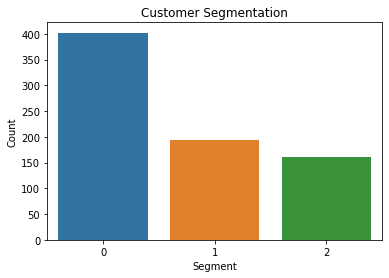

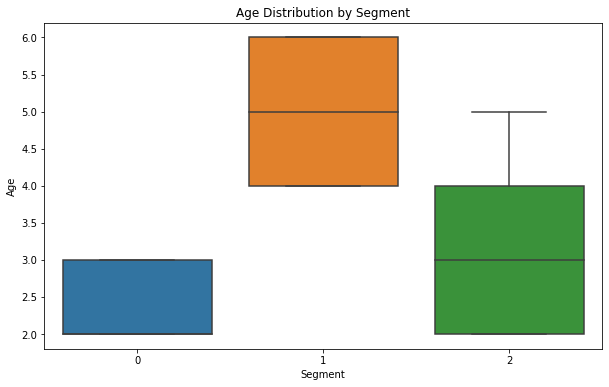

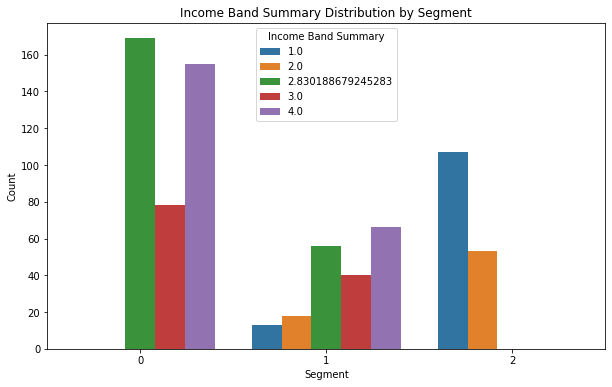

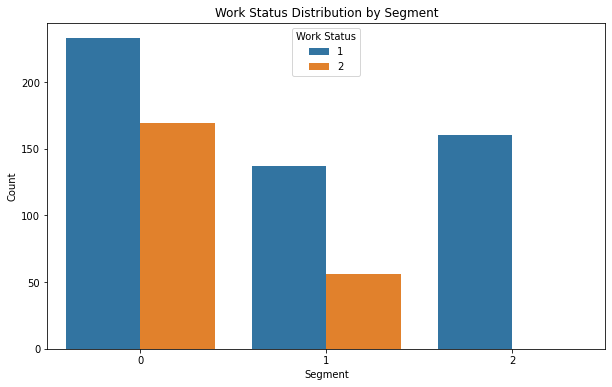

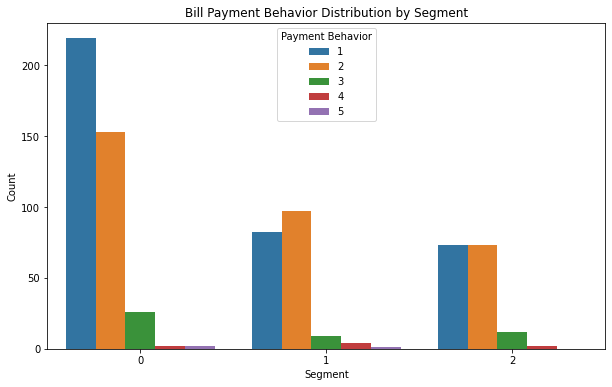

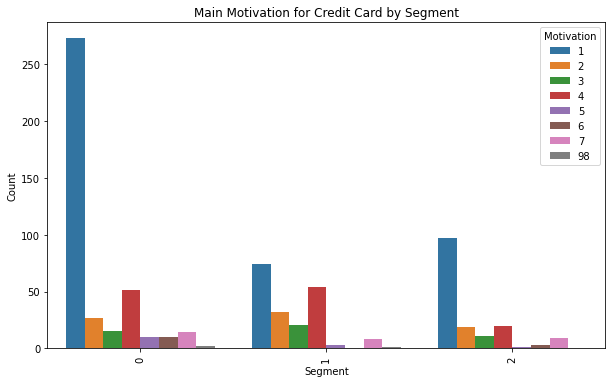

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of customers across segments
sns.countplot(data=df, x='Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Customer Segmentation')
plt.show()

# Visualize the age distribution within each segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Segment', y='Age')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('Age Distribution by Segment')
plt.show()

# Visualize the income band summary distribution within each segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment', hue='Income_Band_Summary')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Income Band Summary Distribution by Segment')
plt.legend(title='Income Band Summary')
plt.show()

# Visualize the work status distribution within each segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment', hue='Employment_Status')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Work Status Distribution by Segment')
plt.legend(title='Work Status')
plt.show()

# Visualize the bill payment behavior distribution within each segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment', hue='Late_Payment_Frequency')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Bill Payment Behavior Distribution by Segment')
plt.legend(title='Payment Behavior')
plt.show()

# Visualize the main motivation for wanting a credit card within each segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment', hue='Credit_Card_Motivation')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Main Motivation for Credit Card by Segment')
plt.legend(title='Motivation')
plt.xticks(rotation=90)
plt.show()


C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

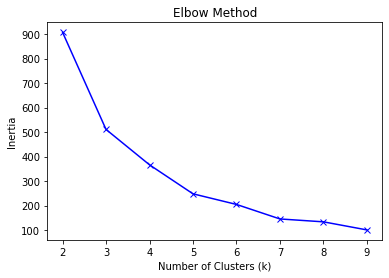

           Gender       Age  Credit_Card_Intention  \
Cluster                                              
0        1.524691  4.740741               1.388889   
1        1.509950  2.276119               1.360697   
2        1.405405  4.945946               1.500000   
3        1.555556  2.367521               1.564103   

         Credit_Card_Planning_Stage  Bank_Account_Ownership  Marital_Status  \
Cluster                                                                       
0                          1.747390                1.135802        1.870370   
1                          1.674929                1.097015        1.542289   
2                          1.808334                1.108108        1.918919   
3                          1.637480                1.102564        1.529915   

         Children_Under_18  Current_Situation  Employment_Status  \
Cluster                                                            
0                 1.382716           4.537037           1.345679

C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dip07\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features_for_clustering = ['Age', 'Income_Band_Summary']

# Create a new DataFrame for clustering
df_clustering = df[features_for_clustering].copy()

# Handle missing values if any
df_clustering.fillna(df_clustering.mean(), inplace=True)  # Fill missing values with column means

# Standardize the data
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 10)  # Test different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow plot, choose the optimal value of k
optimal_k = 4

# Apply K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_clustering_scaled)

# Assign cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


           Gender       Age  Credit_Card_Intention  \
Cluster                                              
0        1.524691  4.740741               1.388889   
1        1.509950  2.276119               1.360697   
2        1.405405  4.945946               1.500000   
3        1.555556  2.367521               1.564103   

         Credit_Card_Planning_Stage  Bank_Account_Ownership  Marital_Status  \
Cluster                                                                       
0                          1.747390                1.135802        1.870370   
1                          1.674929                1.097015        1.542289   
2                          1.808334                1.108108        1.918919   
3                          1.637480                1.102564        1.529915   

         Children_Under_18  Current_Situation  Employment_Status  \
Cluster                                                            
0                 1.382716           4.537037           1.345679

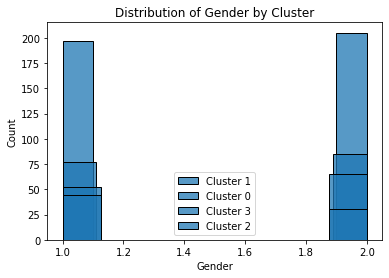

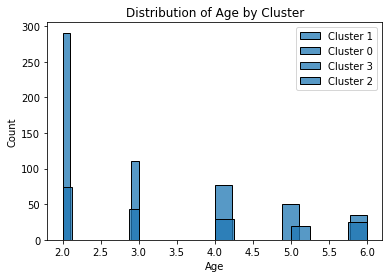

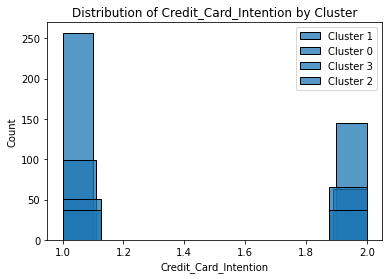

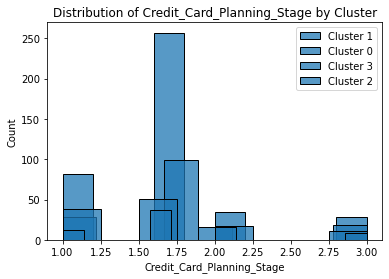

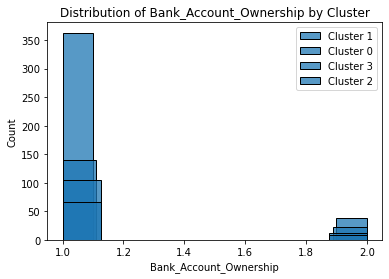

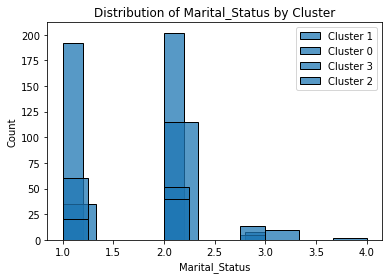

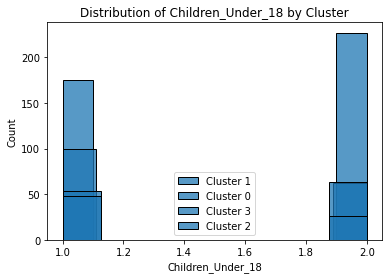

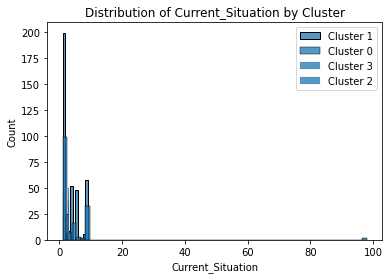

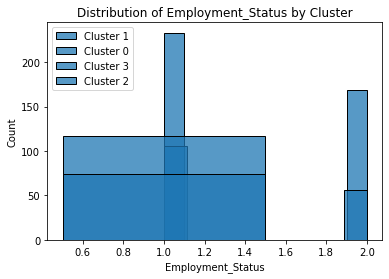

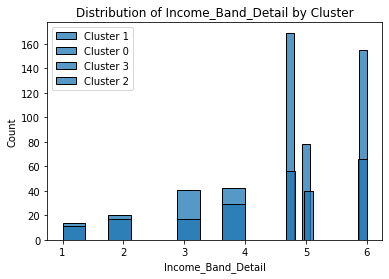

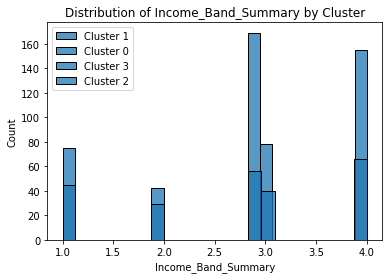

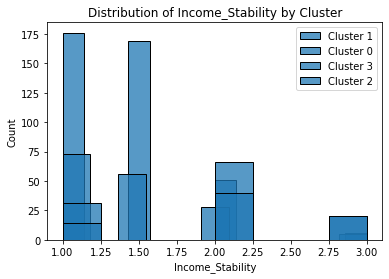

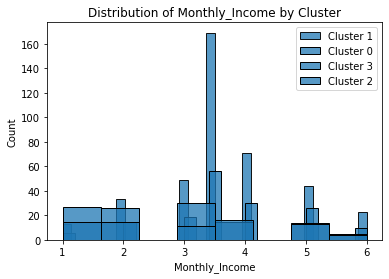

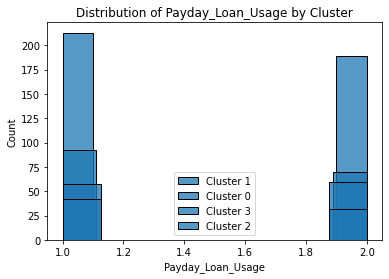

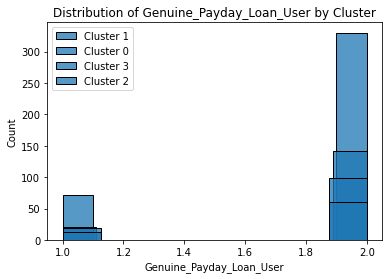

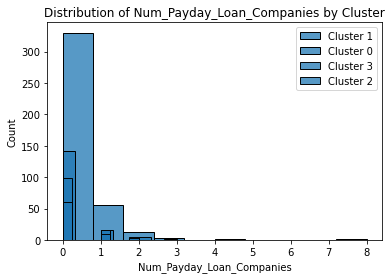

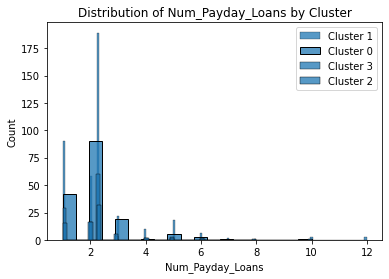

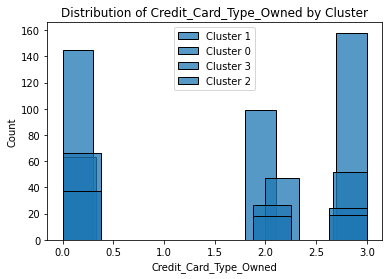

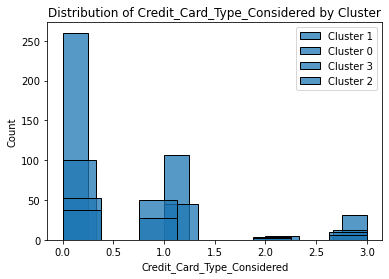

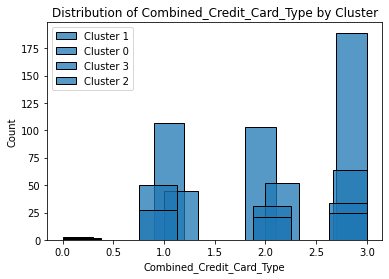

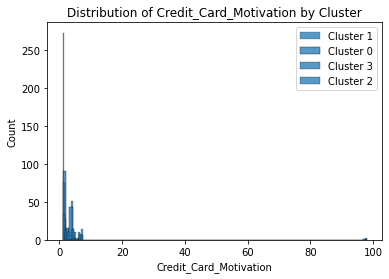

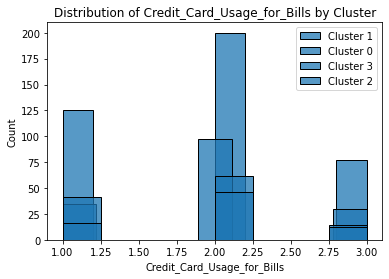

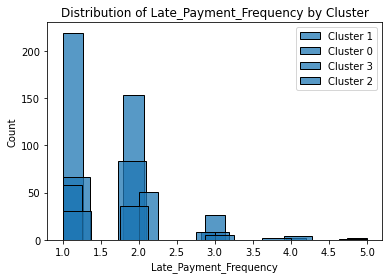

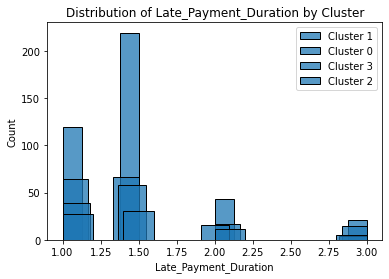

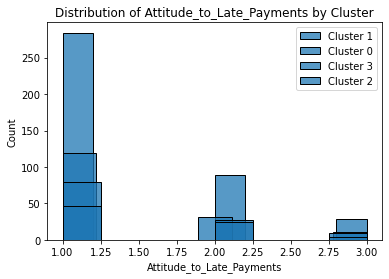

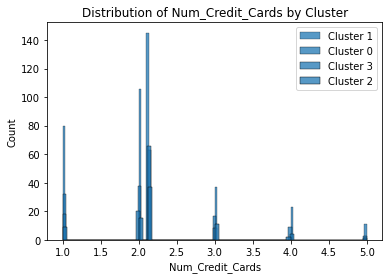

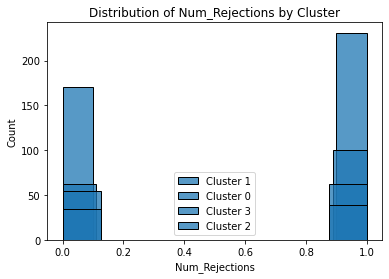

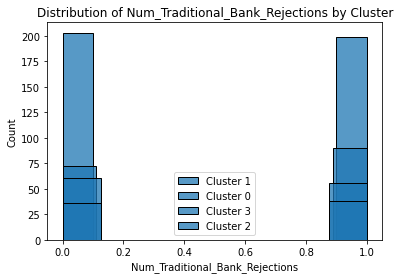

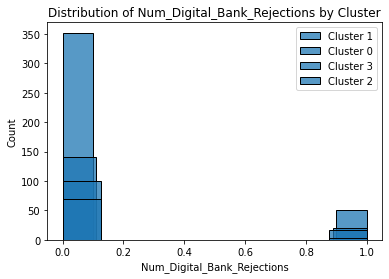

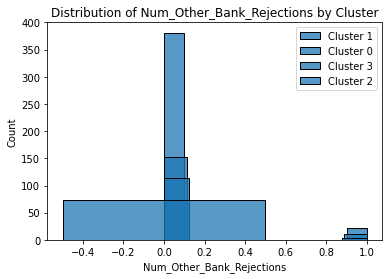

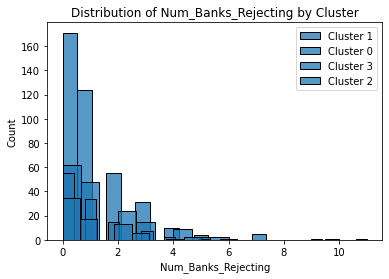

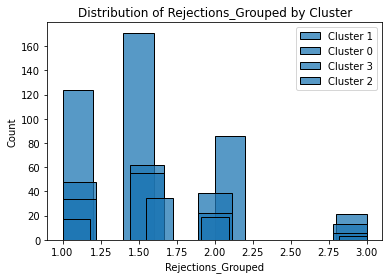

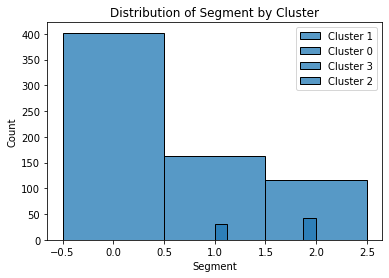

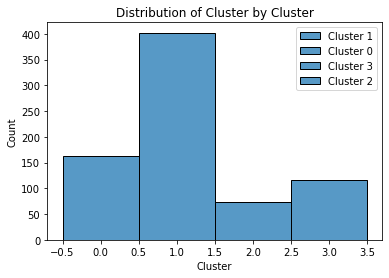

In [23]:
# Calculate summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()

# Print the cluster summary
print(cluster_summary)

# Visualize the distribution of features within each cluster
for feature in df.columns:
    plt.figure()
    for cluster in df['Cluster'].unique():
        sns.histplot(data=df[df['Cluster'] == cluster], x=feature, label=f'Cluster {cluster}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

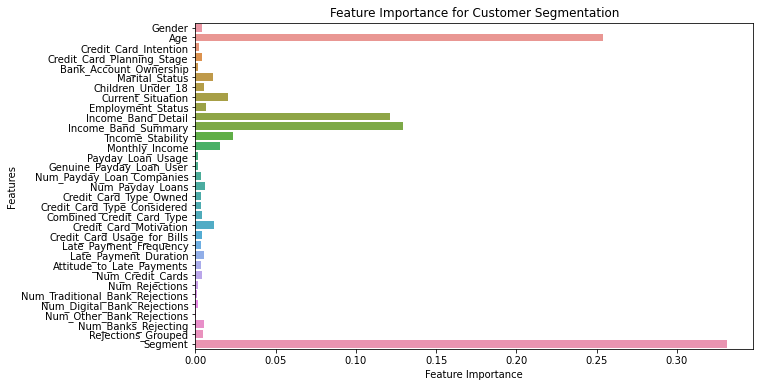

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features and labels
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']

# Train a Random Forest classifier to determine feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Customer Segmentation')
plt.show()


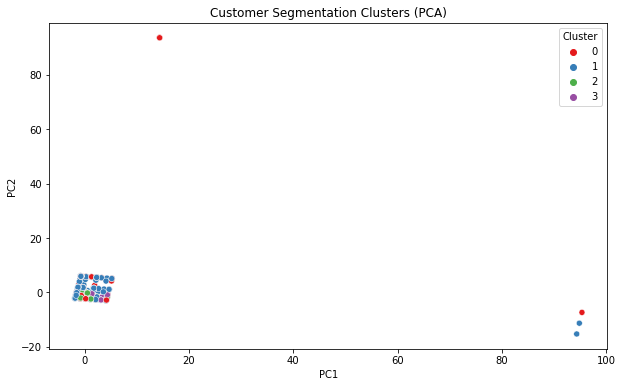

In [25]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the reduced-dimensional data and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Segmentation Clusters (PCA)')
plt.show()


In [26]:
# Compare cluster characteristics
cluster_comparison = cluster_summary.T
print(cluster_comparison)

# Interpret and label each cluster based on their characteristics
cluster_labels = ['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D']
df['Cluster Label'] = [cluster_labels[i] for i in df['Cluster']]
print(df['Cluster Label'].value_counts())


Cluster                                 0         1         2         3
Gender                           1.524691  1.509950  1.405405  1.555556
Age                              4.740741  2.276119  4.945946  2.367521
Credit_Card_Intention            1.388889  1.360697  1.500000  1.564103
Credit_Card_Planning_Stage       1.747390  1.674929  1.808334  1.637480
Bank_Account_Ownership           1.135802  1.097015  1.108108  1.102564
Marital_Status                   1.870370  1.542289  1.918919  1.529915
Children_Under_18                1.382716  1.564677  1.351351  1.538462
Current_Situation                4.537037  3.298507  2.189189  2.051282
Employment_Status                1.345679  1.420398  1.000000  1.000000
Income_Band_Detail               5.291964  5.245175  2.864865  2.948718
Income_Band_Summary              3.348707  3.314184  1.391892  1.358974
Income_Stability                 1.421756  1.384366  2.081081  1.905983
Monthly_Income                   3.681877  3.611560  3.121622  2

In [27]:
# Analyze each cluster and derive actionable insights
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    # Perform further analysis and generate recommendations based on the specific needs and behaviors of each cluster


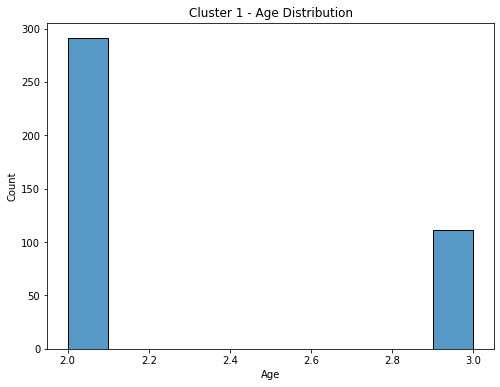

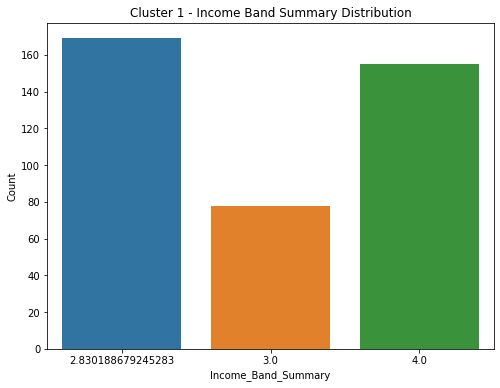

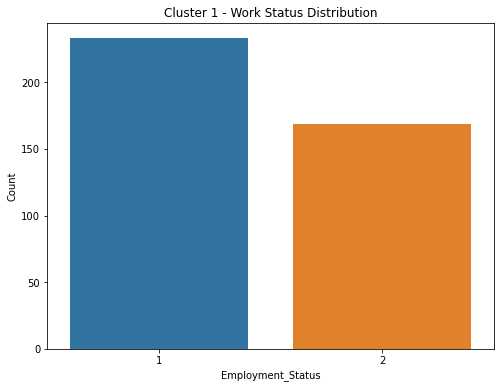

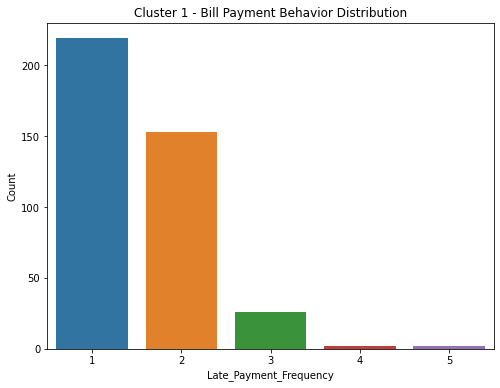

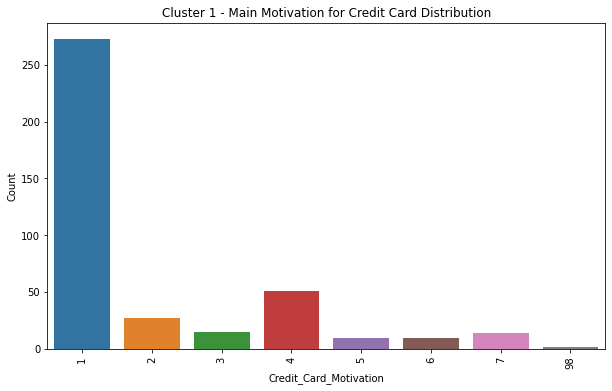

Cluster 1 Insights:




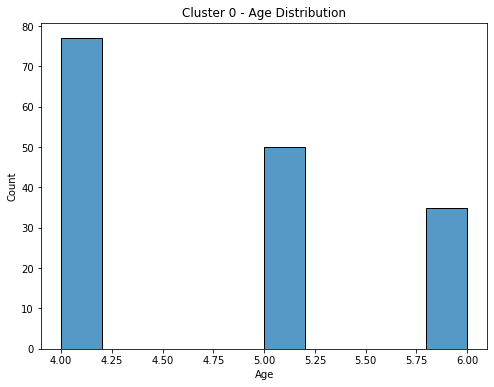

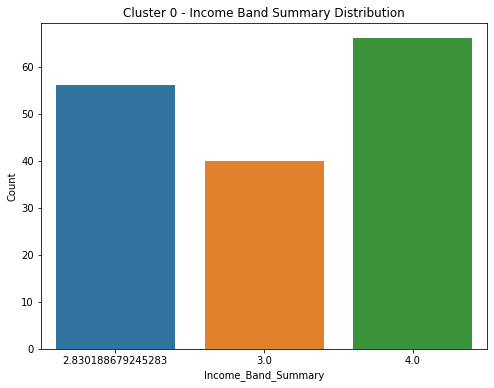

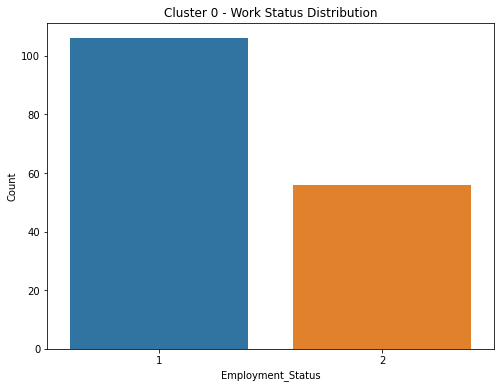

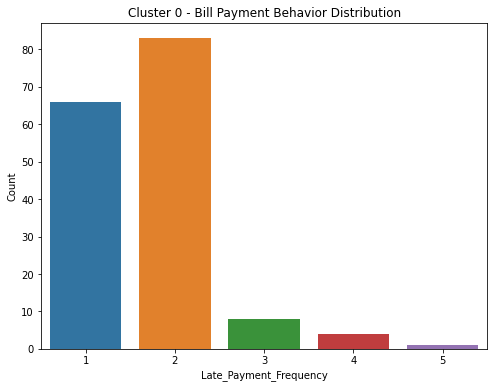

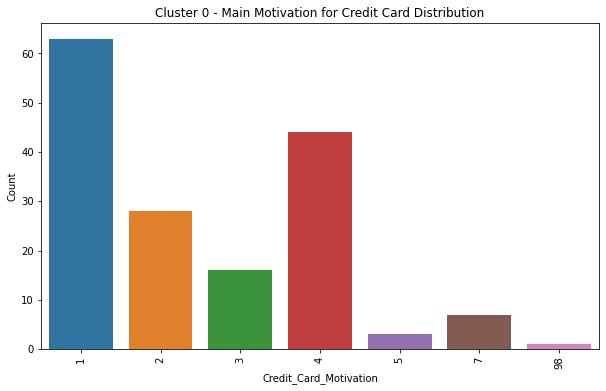

Cluster 0 Insights:




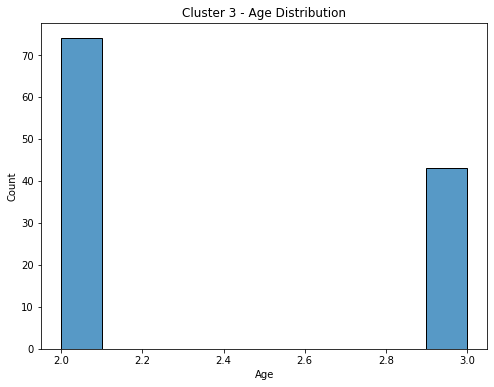

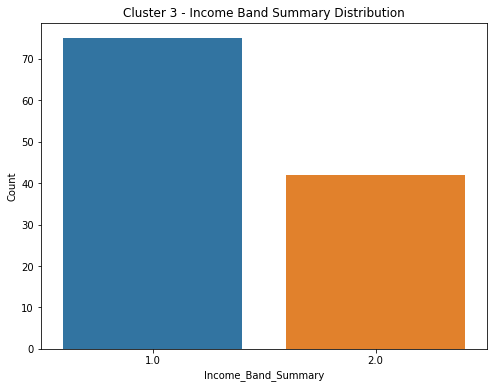

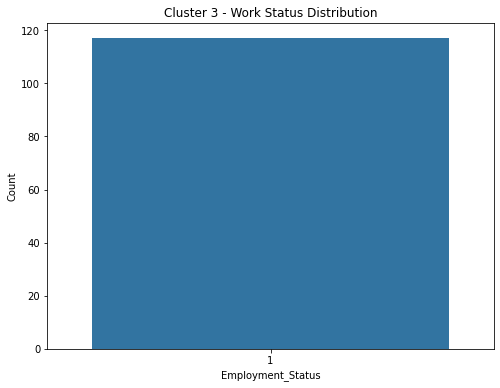

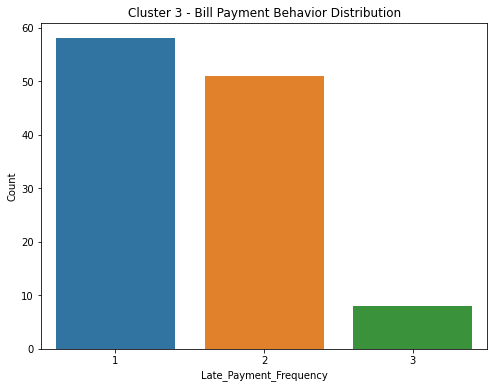

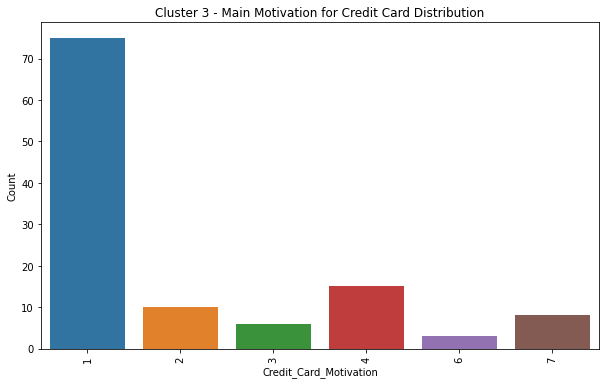

Cluster 3 Insights:




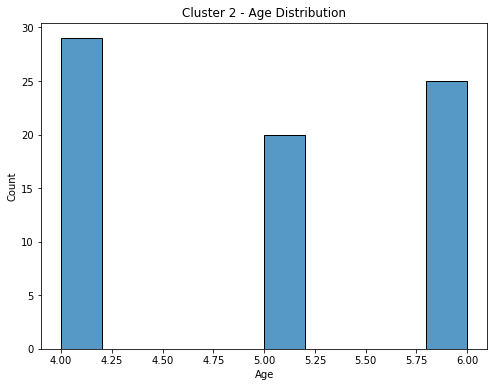

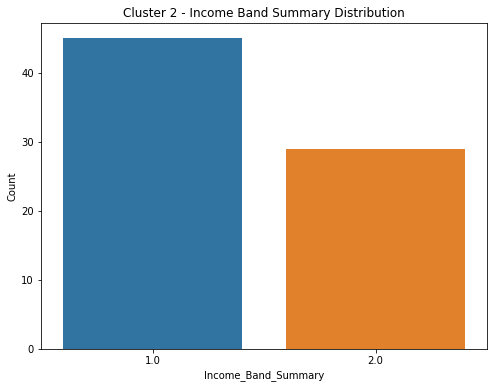

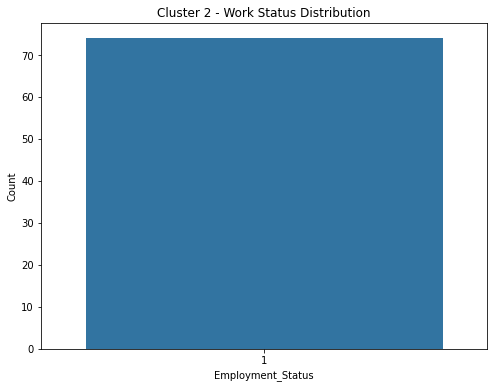

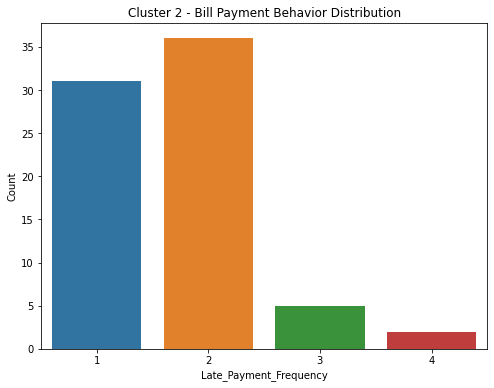

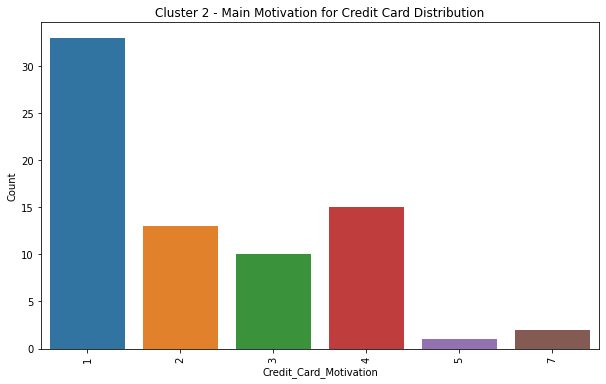

Cluster 2 Insights:




In [28]:
# Visualize the clusters and derive insights
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    
    # Visualize the distribution of age within the cluster
    plt.figure(figsize=(8, 6))
    sns.histplot(data=cluster_data, x='Age', bins=10)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster} - Age Distribution')
    plt.show()

    # Visualize the distribution of income band summary within the cluster
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cluster_data, x='Income_Band_Summary')
    plt.xlabel('Income_Band_Summary')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster} - Income Band Summary Distribution')
    plt.show()

    # Visualize the distribution of work status within the cluster
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cluster_data, x='Employment_Status')
    plt.xlabel('Employment_Status')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster} - Work Status Distribution')
    plt.show()

    # Visualize the distribution of bill payment behavior within the cluster
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cluster_data, x='Late_Payment_Frequency')
    plt.xlabel('Late_Payment_Frequency')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster} - Bill Payment Behavior Distribution')
    plt.show()

    # Visualize the distribution of main motivation for wanting a credit card within the cluster
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cluster_data, x='Credit_Card_Motivation')
    plt.xlabel('Credit_Card_Motivation')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster} - Main Motivation for Credit Card Distribution')
    plt.xticks(rotation=90)
    plt.show()

    # Generate actionable insights for each cluster
    print(f'Cluster {cluster} Insights:')
    # Add your custom code to generate insights and recommendations based on the characteristics and behaviors of each cluster

    print('\n')


In [30]:
df.columns

Index(['Gender', 'Age', 'Credit_Card_Intention', 'Credit_Card_Planning_Stage',
       'Bank_Account_Ownership', 'Marital_Status', 'Children_Under_18',
       'Current_Situation', 'Employment_Status', 'Income_Band_Detail',
       'Income_Band_Summary', 'Income_Stability', 'Monthly_Income',
       'Payday_Loan_Usage', 'Genuine_Payday_Loan_User',
       'Num_Payday_Loan_Companies', 'Num_Payday_Loans',
       'Credit_Card_Type_Owned', 'Credit_Card_Type_Considered',
       'Combined_Credit_Card_Type', 'Credit_Card_Motivation',
       'Credit_Card_Usage_for_Bills', 'Late_Payment_Frequency',
       'Late_Payment_Duration', 'Attitude_to_Late_Payments',
       'Num_Credit_Cards', 'Num_Rejections', 'Num_Traditional_Bank_Rejections',
       'Num_Digital_Bank_Rejections', 'Num_Other_Bank_Rejections',
       'Num_Banks_Rejecting', 'Rejections_Grouped', 'Segment', 'Cluster',
       'Cluster Label'],
      dtype='object')

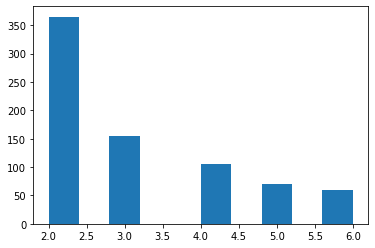

In [31]:
plt.hist(df["Age"])
plt.show()

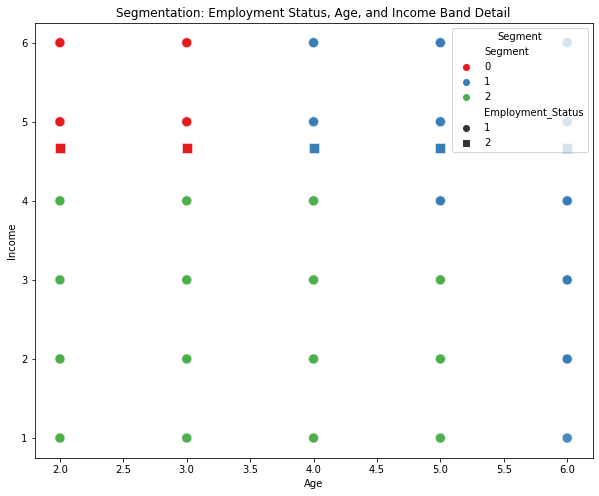

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with working status, age, and income
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Age",
    y="Income_Band_Detail",
    hue="Segment",
    style="Employment_Status",
    palette="Set1",
    markers=["o", "s"],
    alpha=0.7,
    linewidth=0.7,
    s=100,
)

# Add a title and labels to the axes
plt.title("Segmentation: Employment Status, Age, and Income Band Detail")
plt.xlabel("Age")
plt.ylabel("Income")

# Add a legend
plt.legend(title="Segment", loc="upper right")

# Show the plot
plt.show()



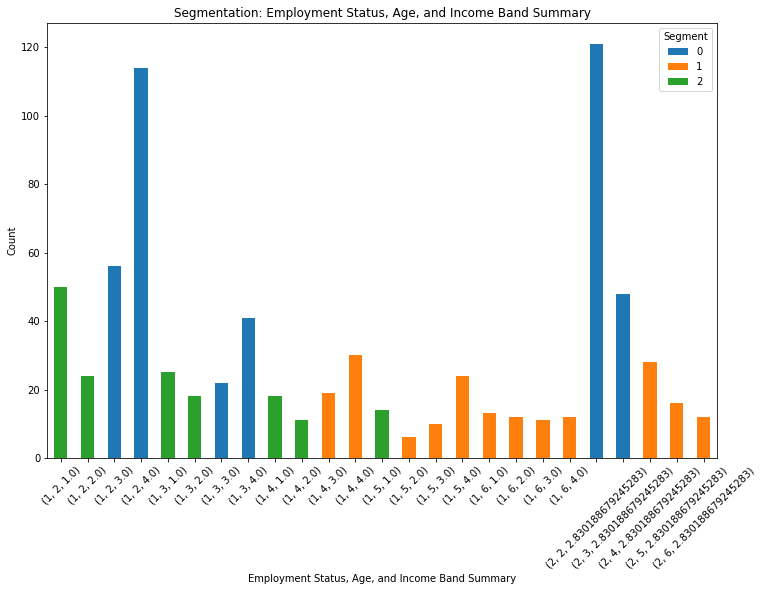

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization
segment_counts = df.groupby(['Employment_Status', 'Age', 'Income_Band_Summary'])['Segment'].value_counts().unstack().fillna(0)

# Create a grouped bar chart
segment_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Employment Status, Age, and Income Band Summary')
plt.ylabel('Count')
plt.title('Segmentation: Employment Status, Age, and Income Band Summary')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.show()

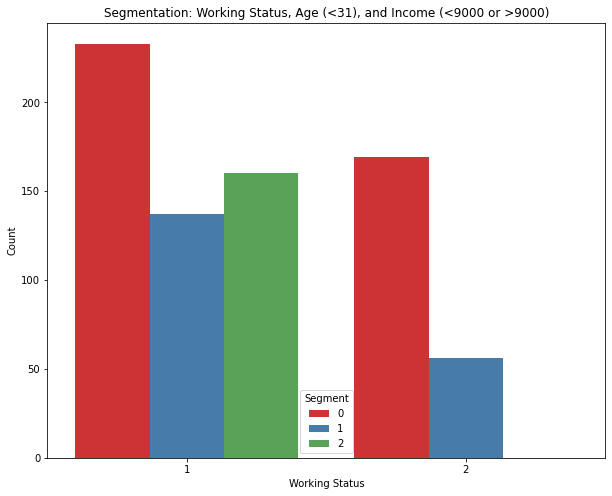

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data based on the specified criteria
filtered_data = df[(df['Age'] < 31) & ((df['Income_Band_Summary'] < 9000) | (df['Income_Band_Summary'] > 9000))]

# Create a grouped bar chart
plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_data, x='Employment_Status', hue='Segment', palette='Set1')
plt.xlabel('Working Status')
plt.ylabel('Count')
plt.title('Segmentation: Working Status, Age (<31), and Income (<9000 or >9000)')
plt.legend(title='Segment')
plt.show()
